In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress = True)
from matplotlib import pyplot as plt

In [71]:
class SSO:
    #initialization
    def __init__(self, fction, Cw, Cp, Cg, maxGen, individuals, dimension):
        self.Cw = Cw
        self.Cp = Cp
        self.Cg = Cg
        self.maxGen = maxGen
        self.individuals = individuals
        self.dimension = dimension
        self.counter = 0
        if(fction.lower() == "sphere"):
            self.fcode = 1
            self.min = -5
            self.max = 5
        elif(fction.lower() == "rastrigin"):
            self.fcode = 2
            self.min = -5.12
            self.max = 5.12
        elif(fction.lower() == "rosenbrock"):
            self.fcode = 3
            self.min = -5
            self.max = 5
        elif(fction.lower() == "schwefel"):
            self.fcode = 4
            self.min = -500
            self.max = 500
        else:
            raise Exception("There is not such kind of functions. Try one of theese: sphere, rastrigin, rosenbrock, schwefel")
        self.population = np.array([np.array([np.random.uniform(self.min, self.max) for _ in range(self.dimension)]) 
                                    for _ in range(self.individuals)])
        self.population = self.__calculate_cost(self.population)
        self.gbest = self.population[np.argmin(self.population[:,-1:])]
        self.pbest = self.population
        self.bestArray = np.array([self.gbest[-1:]]).flatten()
        
            
    #raising the function counter
    def __raise_counter(self):
        self.counter += 1      
        
        
    #built in Rastrinig function
    def __rastrigin(self, x_np_arr, A = 10):
        self.__raise_counter()
        return np.array([A*self.dimension + np.sum(np.power(x_np_arr, 2) - A*np.cos(np.deg2rad(2*x_np_arr*np.pi)))])
    
    #built in Sphere function
    def __sphere(self, x_np_arr):
        self.__raise_counter()
        return np.array([np.sum(np.power(x_np_arr, 2))])
    
    #built in Rosenbrock function
    def __rosenbrock(self, x_np_arr):
        self.__raise_counter()
        return np.array([np.sum(100 * np.power(x_np_arr[1:] - np.power(x_np_arr[:-1], 2), 2) + np.power(1 - x_np_arr[:-1], 2))])
    
    #built in Schwefel function
    def __schwefel(self, x_np_arr):
        self.__raise_counter()
        return np.array([(418.9829 * x_np_arr.size) - np.sum(x_np_arr * np.sin(np.sqrt(np.absolute(x_np_arr))))])
    
    #Calculate the cost, and hstack to the given array
    def __calculate_cost(self, arr):
        if self.fcode == 1:
            return np.hstack((arr, [self.__sphere(x) for x in arr]))
        elif self.fcode == 2:
            return np.hstack((arr, [self.__rastrigin(x) for x in arr]))
        elif self.fcode == 3:
            return np.hstack((arr, [self.__rosenbrock(x) for x in arr]))
        elif self.fcode == 4:
            return np.hstack((arr, [self.__schwefel(x) for x in arr]))
        else:
            raise Exception("There is not such kind of functions. Try one of theese: sphere, rastrigin, rosenbrock, schwefel")                                                                                        
    
    #calculate global best
    def __gbest_fn(self):
        tmp = self.population[np.argmin(self.population[:,-1:])]
        self.bestArray = np.append(self.bestArray, tmp[-1:].flatten())
        return tmp
    
    #main algorithm
    def __main_algorithm_sso(self):
        #split the pop
        ind = self.population[:,:-1]
        fittness_values = self.population[:,-1:]
        #make the random numbers, random values, and gbest ndarray
        tmp_rnd = np.array([np.array([np.random.rand() for _ in range(self.dimension)]) 
                                    for _ in range(self.individuals)])
        tmp_rnd_values = np.array([np.array([np.random.uniform(self.min, self.max) for _ in range(self.dimension)]) 
                                    for _ in range(self.individuals)])
        tmp_gbest_values = np.array([self.gbest[:-1] for _ in range(self.individuals)])

        #change the individuals according the given probability
        ind = np.where(tmp_rnd <= self.Cw, ind, self.pbest[:, :-1])
        ind = np.where(tmp_rnd <= self.Cp, ind, tmp_gbest_values)
        ind = np.where(tmp_rnd <= self.Cg, ind, tmp_rnd_values)
        
        #save the new population
        self.population = self.__calculate_cost(ind)
        
        #save the new global best
        self.gbest = self.__gbest_fn()
        #save the new personal best
        indices = np.argwhere(fittness_values.flatten() > self.population[:,-1:].flatten()).flatten()
        self.pbest[indices] = self.population[indices]
                
    def calculate_SSO(self):
        for i in range(self.maxGen - 1):
            self.__main_algorithm_sso()
        
        return self.gbest, self.bestArray, self.counter

[-0.0875 -0.081   0.0571 -0.0045 -0.0794  0.0484 -0.0716  0.0053 -0.0781
 -0.0135  0.0805 -0.0714  0.0494  0.0603 -0.2946  0.0641 -0.0466  0.0332
 -0.036   0.0431  0.1526]
35000


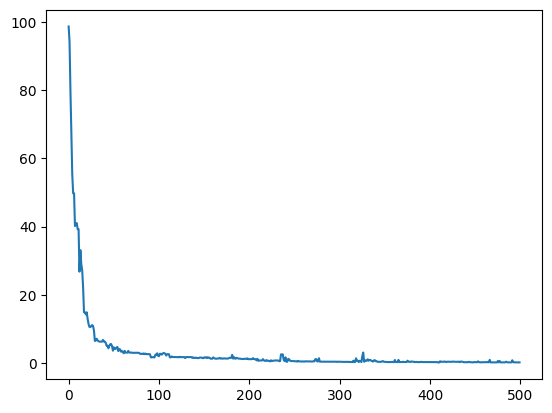

In [85]:
sso = SSO("sphere", 0.55, 0.75, 0.95, 500, 70, 20)
globalBest, bestArray, counter = sso.calculate_SSO()
plt.plot(range(0, 500), bestArray)
print(globalBest)
print(counter)